In [1]:
import ROOT
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [6]:
date = "JUN29"
chain = ROOT.TChain("events")
chain.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))
#chain.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_D0StarRhoCat_2018.root".format(date))
df_SGN = ROOT.RDataFrame(chain)

df_SGN = df_SGN.Define("scale", "w*lumiIntegrated")\
        .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[3]")\
        .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[0]")\
        .Define("goodMeson_ditrk_pt_wrong_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 321, -211, 421, 423, 25)[0]")\
        .Define("goodMeson_leadtrk_pt_GEN", "getMaximum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423, 25))")\
        .Define("goodMeson_subleadtrk_pt_GEN", "getMinimum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423, 25))")\
        .Define("goodPhotons_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")\
        .Define("goodMeson_DR_GEN", "getDR(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25, 211, 421, 423, 25)")\
        .Define("goodMeson_mass_GEN", "getD0StarPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")\
        .Define("goodMeson_pt_GEN", "getD0StarPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[0]")\
        .Define("HCandMassFilt", "Vec_f {HCandMass}")\
        .Define("HCandMassFilt_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25, 22, 25)[3]")\
        .Define("HCandMassMissing", "Vec_f {compute_HiggsVars_var(goodMeson_ditrk_pt[0],goodMeson_ditrk_eta[0],goodMeson_ditrk_phi[0],goodMeson_ditrk_mass[0],photon_pt,goodPhotons_eta[index_pair[1]],goodPhotons_phi[index_pair[1]],0)}")\
        .Define("HCandMassMissing_GEN", "getHiggsPtEtaPhiMD0StarDitrack(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")

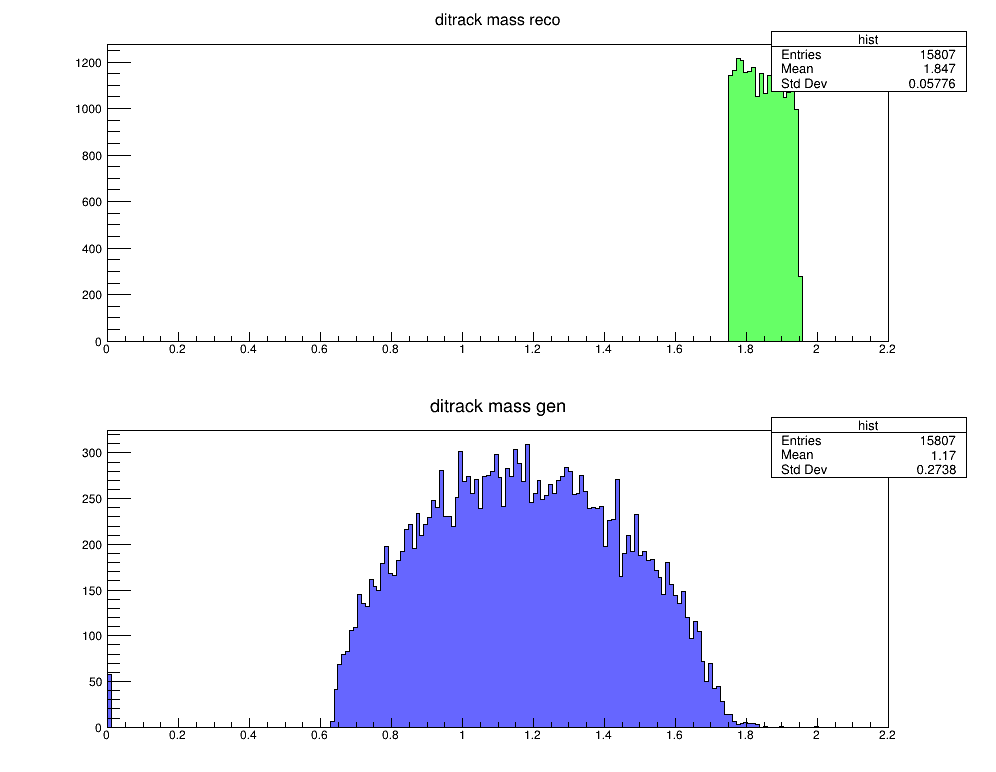

In [3]:
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 800)
canvas.Divide(1, 2)

nbins, xlow, xhigh, var = 200, 0.0, 2.2, "goodMeson_ditrk_mass"

h_rec = df_SGN.Histo1D(("hist", "ditrack mass reco", nbins, xlow, xhigh), var, "scale")
h_gen = df_SGN.Histo1D(("hist", "ditrack mass gen", nbins, xlow, xhigh), var + "_GEN", "scale")

h_gen.SetFillColor(ROOT.kBlue-7)
h_gen.SetLineColor(ROOT.kBlack)
h_rec.SetFillColor(ROOT.kGreen-7)
h_rec.SetLineColor(ROOT.kBlack)

canvas.cd(1)
h_rec.Draw("hist")
canvas.cd(2)
h_gen.Draw("hist")

canvas.Draw()

In [4]:


nbins, xlow, xhigh, var = 200, 0., 200., "goodMeson_ditrk_pt"


h = df_SGN.Histo1D(("hist", "pt", nbins, xlow, xhigh), "goodMeson_ditrk_pt_GEN", "scale")
h_filt = df_SGN.Filter("goodMeson_ditrk_pt_GEN>0").Histo1D(("hist", "pt", nbins, xlow, xhigh), "goodMeson_ditrk_pt_GEN", "scale")
h_filtwrong = df_SGN.Filter("goodMeson_ditrk_pt_wrong_GEN>0").Histo1D(("hist", "pt", nbins, xlow, xhigh), "goodMeson_ditrk_pt_wrong_GEN", "scale")

print("Total: {}".format(h.GetEntries()))
print("K-pi+: {}\t{}".format(h_filt.GetEntries(), round(h_filt.GetEntries()/h.GetEntries()*100, 3)))
print("K+pi-: {}\t{}".format(h_filtwrong.GetEntries(), round(h_filtwrong.GetEntries()/h.GetEntries()*100, 3)))
print("Br(K-pi+)/Br(K+pi-): {}".format(round(h_filt.GetEntries()/h_filtwrong.GetEntries(), 3)))
#D0
#print("Theoretical Br(K-pi+)/Br(K+pi-): {}".format(0.03947/0.00015))
#D0Rho
print("Theoretical Br(K-pi+)/Br(K+pi-): {}".format(0.144/0.000305))



Total: 15807.0
K-pi+: 15762.0	99.715
K+pi-: 45.0	0.285
Br(K-pi+)/Br(K+pi-): 350.267
Theoretical Br(K-pi+)/Br(K+pi-): 472.1311475409836


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


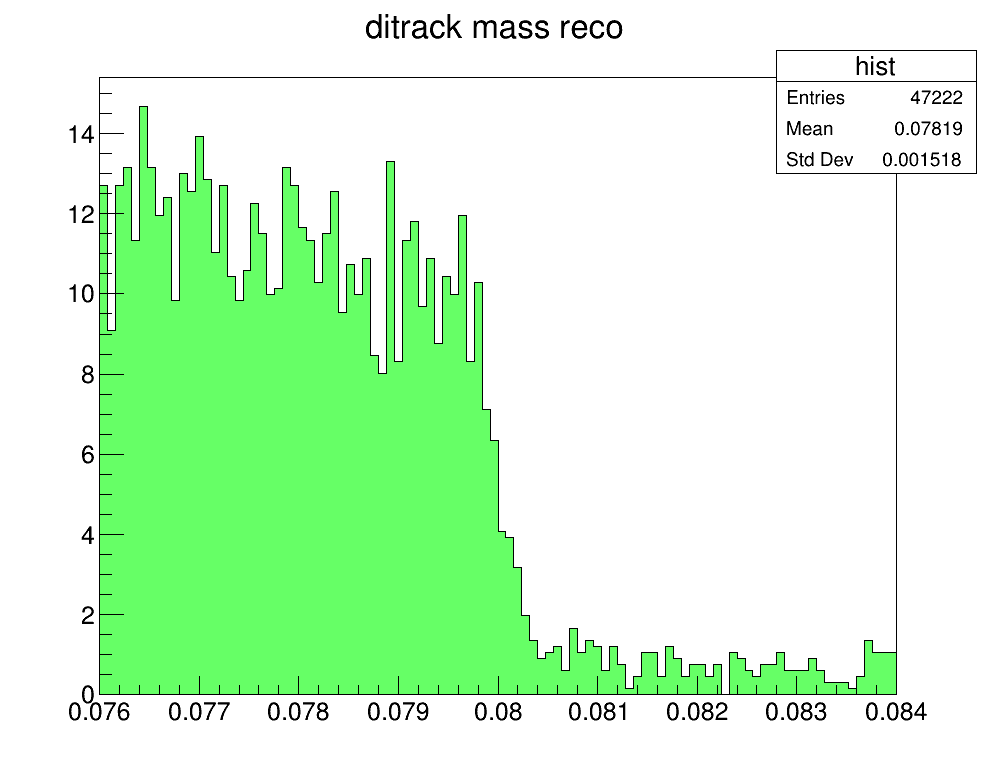

In [11]:
canvas = ROOT.TCanvas("canvas", "canvas", 1000, 800)

nbins, xlow, xhigh, var = 100, 0.076, 0.084, "goodMeson_DR"

h_rec = df_SGN.Histo1D(("hist", "ditrack mass reco", nbins, xlow, xhigh), var, "scale")

h_rec.SetFillColor(ROOT.kGreen-7)
h_rec.SetLineColor(ROOT.kBlack)

h_rec.Draw("hist")

canvas.Draw()